In [1]:
'''
this script is used to extract group dispersion curve at each grid.

Then those observed dispersion curves are interpolated into 8-50s.

Disperion curves with periods less than 6 within 8-50s are ruled out.

'''
# 该脚本提取每个点的频散曲线，并通过内外插值获得8-50s的群速度值，筛选掉了周期数少于6个的频散曲线
import os
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
import numpy as np
files = os.listdir("./Input/InputGroupData/")
os.system('rm -rf ./Output/dispersion_gr && mkdir ./Output/dispersion_gr')
periods = np.array([8,10,12,14,16,18,20,22,24,26,28,30,32,35,40,45,50])
files.sort(key=lambda x:int(x[:-4]))
print(files) # files msut be sorted first. #文件名一定要排序好

['8.dat', '10.dat', '12.dat', '14.dat', '16.dat', '18.dat', '20.dat', '22.dat', '24.dat', '26.dat', '28.dat', '30.dat', '32.dat', '35.dat', '40.dat', '45.dat', '50.dat']


In [2]:
dispersion={}
for file in files:
    if(file[-4:]=='.dat'):
        temp=file.split('.')
        period=temp[0] 
        print(period,file)
        lines = np.loadtxt("./Input/InputGroupData/"+file)
        for line in lines:
            lon,lat,vel,error = line[0],line[1],line[2],line[3]
            error=float(error)
            key = "%.2f"%lat+'_'+"%.2f"%lon;
            if key in dispersion:
                dispersion[key].append([float(period),float(vel),float(error)])
            else:
                dispersion[key] = [[float(period),float(vel),float(error)]]                                        
# print(dispersion['37.5_103'])
# extract all periods,not just 8-50s
#https://stackoverflow.com/questions/2745329/how-to-make-scipy-interpolate-give-an-extrapolated-result-beyond-the-input-range
# fig = plt.figure(1)
key_all = []
count = 0
for key in dispersion:
    a = np.array(dispersion[key])
    x = a[:,0];y = a[:,1]; z = a[:,2]
    if(len(periods) - len(x))<5:
        key_all.append(key)
        count = count+1
        
        f1 = InterpolatedUnivariateSpline(x, y,k=1) #quadratic
        f2 = InterpolatedUnivariateSpline(x, z,k=1)
        vel_new   = f1(periods)
        error_new = f2(periods)


    #             plt.plot(periods,vel_new,'o')
    #             plt.plot(x,y,'*-')
    #             plt.pause(0.1)
    #             plt.clf()
        with open('./Output/dispersion_gr/'+key+'.txt','w') as f:
            for i in range(len(periods)):
                f.write("{} \t {:.3f} \t {:.4f}\n".format(periods[i],vel_new[i],error_new[i]))
#                 f.write("{} \t {:.3f} \n".format(periods[i],vel_new[i]))
print(count,key)
print("ok return")

8 8.dat
10 10.dat
12 12.dat
14 14.dat
16 16.dat
18 18.dat
20 20.dat
22 22.dat
24 24.dat
26 26.dat
28 28.dat
30 30.dat
32 32.dat
35 35.dat
40 40.dat
45 45.dat
50 50.dat
4666 30.50_133.00
ok return


4666


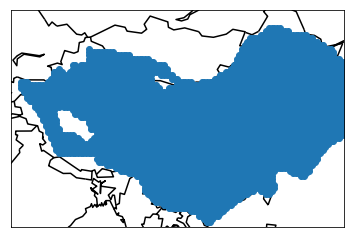

In [4]:
from mpl_toolkits.basemap import Basemap
fig=plt.figure(5)
m = Basemap(projection='mill', llcrnrlon=73, llcrnrlat=18, urcrnrlon=135,
            urcrnrlat=53)
m.drawcountries(linewidth=1.5)
m.drawcoastlines(linewidth=1.5)
count = 0
lat_all=[]
lon_all=[]
for i in key_all:
    count=count+1
    
    lat,lon=i.split("_")
    lat_all.append(float(lat))
    lon_all.append(float(lon))
lon_all,lat_all = m(lon_all,lat_all)
print(count)
plt.plot((lon_all),(lat_all), 'o')
plt.pause(1)